In [117]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Training Multiple Linear Regression Model of first Layer

In [157]:
## Load Data

data = pd.read_csv("../ProcessedData/aluminium_factors.csv")
data["Date"] = pd.to_datetime(data["Date"])

In [159]:
X_1 = data[["GDP", "Open_usd_index", "Production_total", "Energy_index", "Open_usd_ruble", "Open_usd_rupee", "Open_usd_cad", "Open_usd_yuan", "Zinc", "Nickel"]]
y_1 = data["Price"]

### Performance Test on Train Data

In [120]:
regr = linear_model.LinearRegression()
regr.fit(X_1, y_1)

LinearRegression()

In [121]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[]

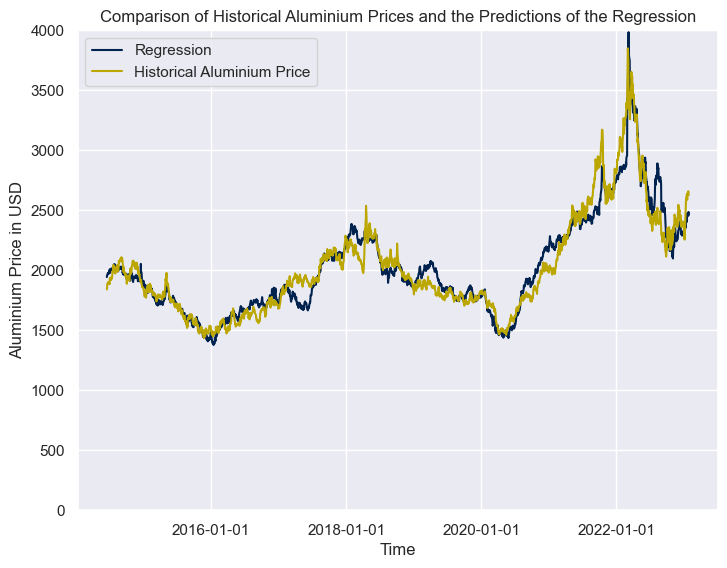

In [122]:
predictions = regr.predict(X_1.to_numpy())

sns.set_theme(style="darkgrid")
cmap = matplotlib.cm.get_cmap('cividis')

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(data["Date"], predictions, label="Regression", color=cmap(0))
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(data["Date"], y_1, label = "Historical Aluminium Price", color=lighten_color(cmap(2.1), 1.6))
ax1.set_xlabel("Time")
ax1.set_ylabel("Aluminium Price in USD")
#plt.plot(data["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("Comparison of Historical Aluminium Prices and the Predictions of the Regression")
plt.ylim([0, 4000])
plt.plot()

In [123]:
predictions = regr.predict(X_1.to_numpy())
print(mean_absolute_error(y_1, predictions))
print(mean_squared_error(y_1, predictions))
print(mean_absolute_error(y_1, predictions) / y_1.mean())

84.9129120265669
13729.564891595037
0.042100585420601834


d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [124]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1772.1573605415915
Coefficients: 
 [ 7.71458696e+00 -4.41014998e+00  1.50198521e-02  2.10803566e+00
  9.52832400e+00  1.09993240e+00 -7.61518189e+02 -1.89066463e+02
  3.42889088e-01  5.37869442e-03]


### Performance Test on Test Data

In [163]:
regr = linear_model.LinearRegression()
regr.fit(X_1.iloc[:-60], y_1.iloc[:-60])

LinearRegression()

d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[]

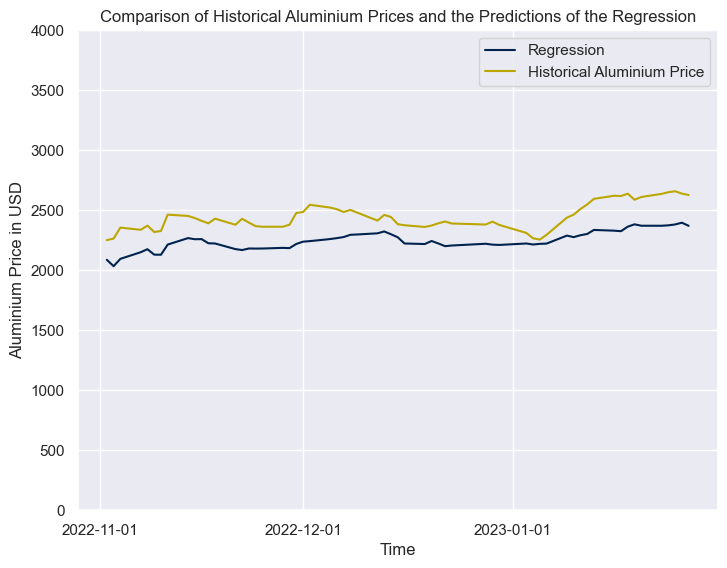

In [164]:
predictions = regr.predict(X_1.iloc[-60:].to_numpy())

sns.set_theme(style="darkgrid")
cmap = matplotlib.cm.get_cmap('cividis')

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(data["Date"].iloc[-60:], predictions, label="Regression", color=cmap(0))
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(data["Date"].iloc[-60:], y_1.iloc[-60:], label = "Historical Aluminium Price", color=lighten_color(cmap(2.1), 1.6))
ax1.set_xlabel("Time")
ax1.set_ylabel("Aluminium Price in USD")
#plt.plot(data["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("Comparison of Historical Aluminium Prices and the Predictions of the Regression")
plt.ylim([0, 4000])
plt.plot()

In [165]:
predictions = regr.predict(X_1.iloc[-30:].to_numpy())
print(mean_absolute_error(y_1.iloc[-30:], predictions))
print(mean_squared_error(y_1.iloc[-30:], predictions))
print(mean_absolute_error(y_1.iloc[-30:], predictions) / y_1.iloc[-30:].mean())

189.44414674339495
41028.01100865007
0.07653432808771855


d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Performance Test on Steel Prices

In [128]:
data = pd.read_csv("../ProcessedData/factors.csv")
data["Date"] = pd.to_datetime(data["Date"])

In [129]:
steel_prices = pd.read_csv("../AdditionalData/SteelPrices.csv")
steel_prices = steel_prices[["Date", "Close"]]
steel_prices["Date"] = pd.to_datetime(steel_prices["Date"], format="%m/%d/%y")
steel_prices = steel_prices.reindex(index=steel_prices.index[::-1])
steel_prices.rename(columns={"Close": "Price"}, inplace=True)

In [130]:
steel_added = pd.merge(left=data, right=steel_prices, left_on="Date", right_on="Date", how="inner")

In [131]:
X_1 = steel_added[["GDP", "Open_usd_index", "Production_total", "Energy_index", "Open_usd_ruble", "Open_usd_rupee", "Open_usd_cad", "Open_usd_yuan", "Zinc", "Nickel"]]
y_1 = steel_added["Price"]

In [132]:
steel_added.dropna(inplace=True)
X_train = X_1.iloc[:-90]
y_train = y_1.iloc[:-90]
X_test = X_1.iloc[-90:]
y_test = y_1.iloc[-90:]

In [133]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[]

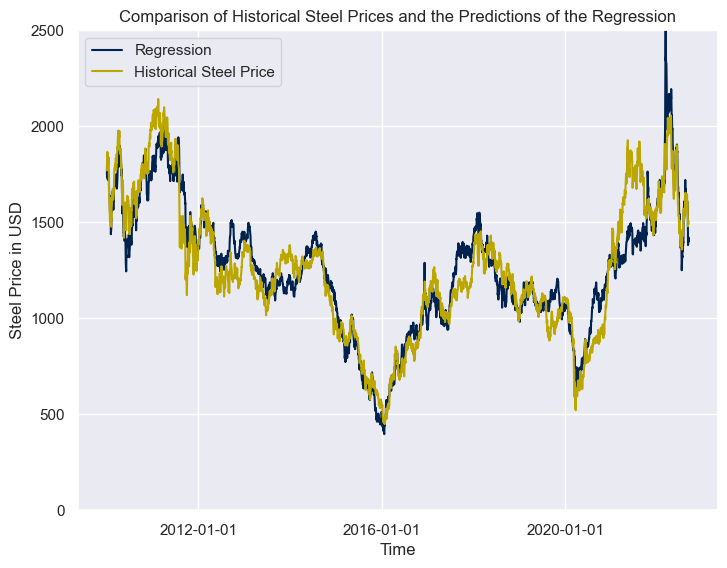

In [134]:
predictions = regr.predict(X_train.to_numpy())

sns.set_theme(style="darkgrid")
cmap = matplotlib.cm.get_cmap('cividis')

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(steel_added["Date"].iloc[:-90], predictions, label="Regression", color=cmap(0))

ax1.plot(steel_added["Date"].iloc[:-90], y_train, label = "Historical Steel Price", color=lighten_color(cmap(2.1), 1.6))
ax1.set_xlabel("Time")
ax1.set_ylabel("Steel Price in USD")

ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("Comparison of Historical Steel Prices and the Predictions of the Regression")
plt.ylim([0, 2500])
plt.plot()

In [135]:
predictions = regr.predict(X_train.to_numpy())
print(mean_absolute_error(y_train, predictions))
print(mean_squared_error(y_train, predictions))
print(mean_absolute_error(y_train, predictions) / y_train.mean())

95.04017257192307
16356.783814615763
0.07568423239844185


d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [136]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 716.936589145994
Coefficients: 
 [ 8.83649829e-01 -1.24146755e+01  2.79998830e-04  7.55417926e-01
  2.82772293e+00 -5.67079325e+00 -1.04318373e+03  2.67703878e+02
  3.63839852e-01  1.64304166e-02]


### Performance Test on Test Data

In [137]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[]

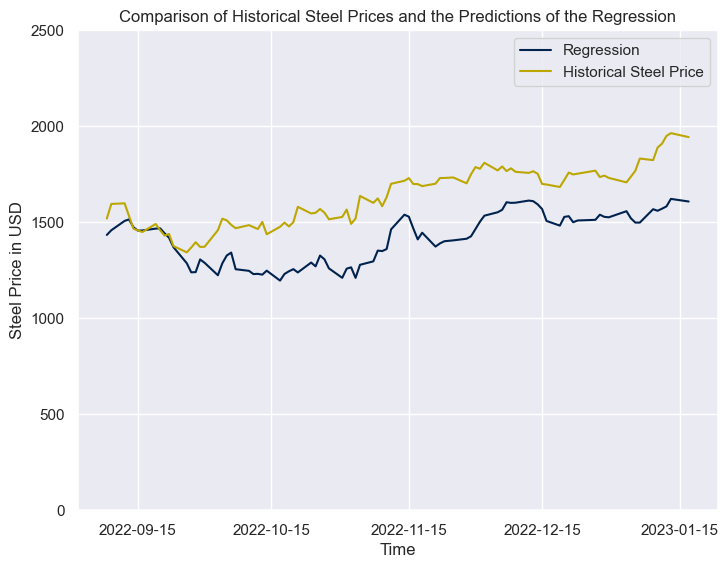

In [138]:
predictions = regr.predict(X_test.to_numpy())

sns.set_theme(style="darkgrid")
cmap = matplotlib.cm.get_cmap('cividis')

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(steel_added["Date"].iloc[-90:], predictions, label="Regression", color=cmap(0))
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(steel_added["Date"].iloc[-90:], y_test, label = "Historical Steel Price", color=lighten_color(cmap(2.1), 1.6))
ax1.set_xlabel("Time")
ax1.set_ylabel("Steel Price in USD")
#plt.plot(data["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("Comparison of Historical Steel Prices and the Predictions of the Regression")
plt.ylim([0, 2500])
plt.plot()

In [139]:
predictions = regr.predict(X_test.to_numpy())
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions) / y_test.mean())

213.1018867955493
54645.30540017962
0.13084651749745022


d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Training Multiple Linear Regression Model for Second Layer

In [140]:
#Load data
data = pd.read_csv("../ProcessedData/factors.csv")
data["Date"] = pd.to_datetime(data["Date"])

In [141]:
X_2 = data[["Oil", "Natural Gas"]]
y_2 = data["Energy_index"]

In [142]:
regr = linear_model.LinearRegression()
regr.fit(X_2, y_2)

LinearRegression()

d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[]

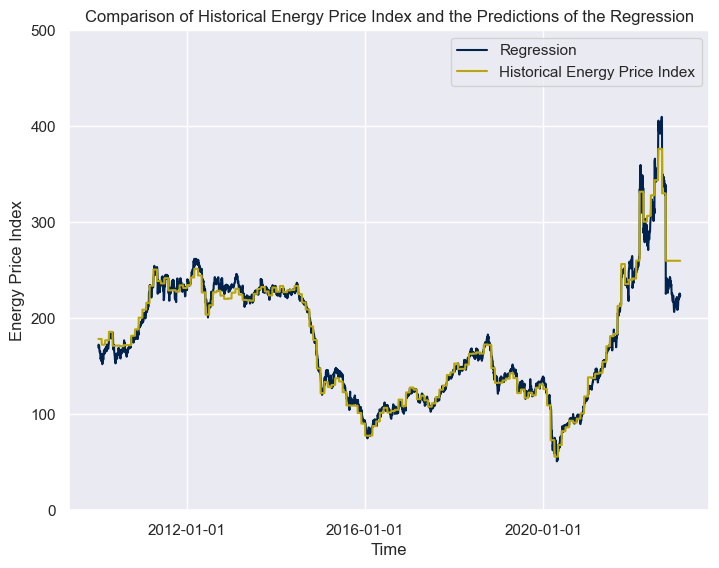

In [143]:
predictions = regr.predict(X_2.to_numpy())

sns.set_theme(style="darkgrid")
cmap = matplotlib.cm.get_cmap('cividis')

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(data["Date"], predictions, label="Regression", color=cmap(0))
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(data["Date"], y_2, label = "Historical Energy Price Index", color=lighten_color(cmap(2.1), 1.6))
ax1.set_xlabel("Time")
ax1.set_ylabel("Energy Price Index")
#plt.plot(data["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("Comparison of Historical Energy Price Index and the Predictions of the Regression")
plt.ylim([0, 500])
plt.plot()

In [144]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 12.17368752564147
Coefficients: 
 [1.65712703 3.24474241]


# Performance Test TK Data

### Test on Test Data

In [145]:
data = pd.read_csv("../ProcessedData/MG_factors.csv")

In [146]:
X_train = data[["GDP", "Open_usd_index", "Production_total", "Energy_index", "Open_usd_ruble", "Open_usd_rupee", "Open_usd_cad", "Open_usd_yuan", "Zinc", "Nickel"]].iloc[:-10]
y_train = data["5810"].iloc[:-10]
X_test = data[["GDP", "Open_usd_index", "Production_total", "Energy_index", "Open_usd_ruble", "Open_usd_rupee", "Open_usd_cad", "Open_usd_yuan", "Zinc", "Nickel"]].iloc[-10:]
y_test = data["5810"].iloc[-10:]

In [147]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[]

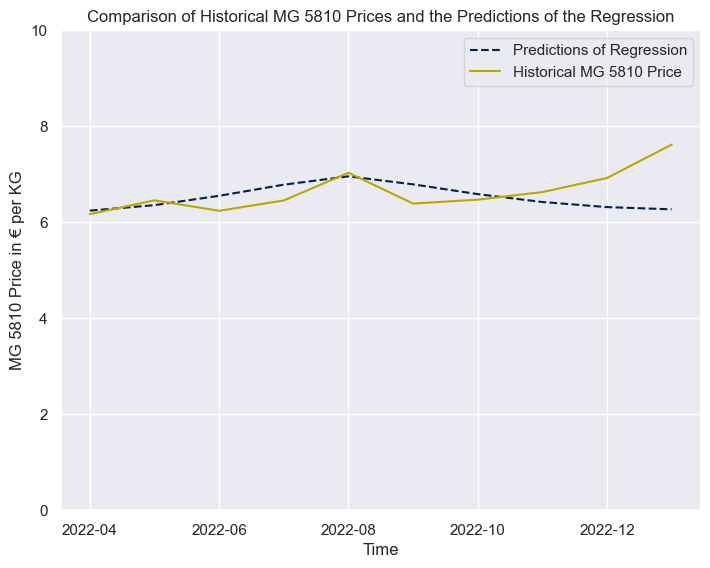

In [148]:
predictions = regr.predict(X_test.to_numpy())

sns.set_theme(style="darkgrid")
cmap = matplotlib.cm.get_cmap('cividis')

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(data["date"].iloc[-10:], predictions, label="Predictions of Regression", color=cmap(0), linestyle="dashed")
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(data["date"].iloc[-10:], y_test, label = "Historical MG 5810 Price", color=lighten_color(cmap(2.1), 1.6))
ax1.set_xlabel("Time")
ax1.set_ylabel("MG 5810 Price in € per KG")
#plt.plot(data["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("Comparison of Historical MG 5810 Prices and the Predictions of the Regression")
plt.ylim([0, 10])
plt.plot()

In [149]:
predictions = regr.predict(X_test.to_numpy())
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions) / y_test.mean())

0.35681087042782245
0.2631240762594591
0.05375350644666869


d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [150]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -5.173535280696061
Coefficients: 
 [ 2.56441140e-02  3.83277236e-02  2.09013143e-05  4.50072706e-03
 -4.07895432e-03  7.88402011e-02 -5.88740918e-01 -3.45948130e-01
  1.13487917e-04 -9.99562708e-07]


### Test on all data

In [151]:
data = pd.read_csv("../ProcessedData/MG_factors.csv")

In [152]:
X = data[["GDP", "Open_usd_index", "Production_total", "Energy_index", "Open_usd_ruble", "Open_usd_rupee", "Open_usd_cad", "Open_usd_yuan", "Zinc", "Nickel"]]
y = data["5810"]


In [153]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[]

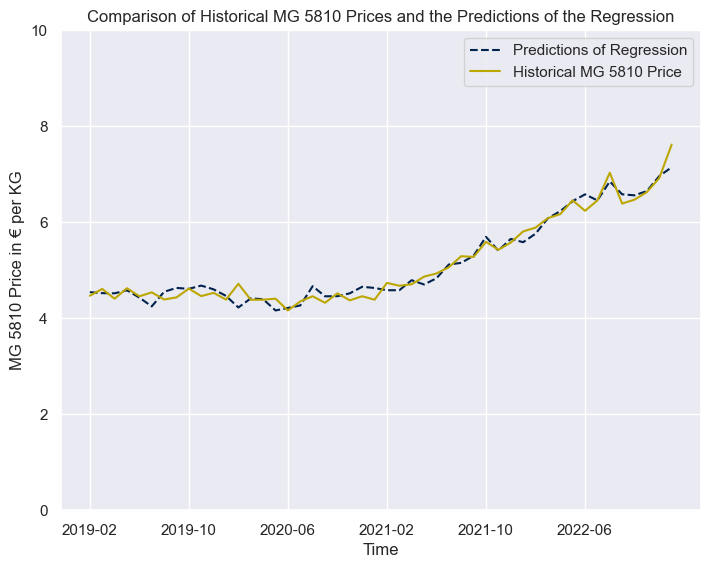

In [154]:
import matplotlib
predictions = regr.predict(X.to_numpy())

sns.set_theme(style="darkgrid")
cmap = matplotlib.cm.get_cmap('cividis')

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(data["date"], predictions, label="Predictions of Regression", linestyle="dashed", color=cmap(0))
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(data["date"], y, label = "Historical MG 5810 Price", color=lighten_color(cmap(2.1), 1.6))
ax1.set_xlabel("Time")
ax1.set_ylabel("MG 5810 Price in € per KG")
#plt.plot(data["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
ax1.set_xticks(ax1.get_xticks()[::8])
ax1.legend()
ax1.set_title("Comparison of Historical MG 5810 Prices and the Predictions of the Regression")
plt.ylim([0, 10])
plt.plot()

In [155]:
predictions = regr.predict(X.to_numpy())
print(mean_absolute_error(y, predictions))
print(mean_squared_error(y, predictions))
print(mean_absolute_error(y, predictions) / y.mean())

0.12636007985692435
0.0280278143146153
0.02453894830087067


d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
